In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import *


**I. Chargement du jeu de données train**

In [2]:
#Chargement des données

df=pd.read_csv('train.csv')
df.head()

C:\Users\gladi\AppData\Local\Temp\ipykernel_21416\980323232.py:3: DtypeWarning: Columns (26,56,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('train.csv')


,sub_id,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,...,transfers_out,value,was_home,winning_goals,yellow_cards,GW,position,team,xP,Target
0,0,Leonardo_Ulloa,0,2.0,0.0,0.0,0,2,0,0.0,...,0,60,False,0.0,0,1,NaN,NaN,NaN,1.0
1,1,Christian_Fuchs,0,62.0,0.0,1.0,0,17,0,5.0,...,0,55,False,0.0,1,1,NaN,NaN,NaN,6.0
2,2,Ron-Robert_Zieler,0,0.0,0.0,0.0,0,0,0,0.0,...,0,45,False,0.0,0,1,NaN,NaN,NaN,0.0
3,3,Moses_Odubajo,0,0.0,0.0,0.0,0,0,0,0.0,...,0,45,True,0.0,0,1,NaN,NaN,NaN,0.0
4,4,Riyad_Mahrez,0,48.0,0.0,0.0,1,23,0,0.0,...,0,95,False,0.0,0,1,NaN,NaN,NaN,3.0


**II. Exploration du jeu de données train**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99596 entries, 0 to 99595
Data columns (total 60 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   sub_id                           99596 non-null  int64  
 1   name                             99596 non-null  object 
 2   assists                          99596 non-null  int64  
 3   attempted_passes                 53410 non-null  float64
 4   big_chances_created              53410 non-null  float64
 5   big_chances_missed               53410 non-null  float64
 6   bonus                            99596 non-null  int64  
 7   bps                              99596 non-null  int64  
 8   clean_sheets                     99596 non-null  int64  
 9   clearances_blocks_interceptions  53410 non-null  float64
 10  completed_passes                 53410 non-null  float64
 11  creativity                       99596 non-null  float64
 12  dribbles          

In [4]:
df.columns

Index(['sub_id', 'name', 'assists', 'attempted_passes', 'big_chances_created',
       'big_chances_missed', 'bonus', 'bps', 'clean_sheets',
       'clearances_blocks_interceptions', 'completed_passes', 'creativity',
       'dribbles', 'ea_index', 'element', 'errors_leading_to_goal',
       'errors_leading_to_goal_attempt', 'fixture', 'fouls', 'goals_conceded',
       'goals_scored', 'ict_index', 'id', 'influence', 'key_passes',
       'kickoff_time', 'kickoff_time_formatted', 'loaned_in', 'loaned_out',
       'minutes', 'offside', 'open_play_crosses', 'opponent_team', 'own_goals',
       'penalties_conceded', 'penalties_missed', 'penalties_saved',
       'recoveries', 'red_cards', 'round', 'saves', 'selected', 'tackled',
       'tackles', 'target_missed', 'team_a_score', 'team_h_score', 'threat',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'winning_goals', 'yellow_cards', 'GW', 'position', 'team',
       'xP', 'Target'],
      dtype='object'

In [5]:
df.shape

(99596, 60)

In [6]:
df.describe()

,sub_id,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,...,threat,transfers_balance,transfers_in,transfers_out,value,winning_goals,yellow_cards,GW,xP,Target
count,99596.000000,99596.000000,53410.000000,53410.000000,53410.000000,99596.000000,99596.000000,99596.000000,53410.000000,53410.000000,...,99596.000000,9.959600e+04,9.959600e+04,9.959600e+04,99596.000000,53410.000000,99596.000000,99596.000000,28807.000000,99596.000000
mean,49797.500000,0.039951,15.209268,0.042595,0.032166,0.106259,6.115858,0.106801,1.371372,12.048231,...,5.413169,6.913918e+02,1.095853e+04,1.026673e+04,51.829069,0.013350,0.054199,19.425871,1.316697,1.356109
std,28751.033042,0.213224,22.202145,0.223005,0.194320,0.487388,9.855073,0.308862,2.799814,18.822005,...,13.670134,4.963442e+04,4.269660e+04,3.719086e+04,12.623234,0.114768,0.226411,11.407333,2.077795,2.509173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000,0.000000,0.000000,0.000000,...,0.000000,-1.734284e+06,0.000000e+00,0.000000e+00,37.000000,0.000000,0.000000,1.000000,-2.500000,-7.000000
25%,24898.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.315000e+03,4.200000e+01,1.290000e+02,44.000000,0.000000,0.000000,10.000000,0.000000,0.000000
50%,49797.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-7.500000e+01,3.620000e+02,9.710000e+02,48.000000,0.000000,0.000000,19.000000,0.500000,0.000000
75%,74696.250000,0.000000,28.000000,0.000000,0.000000,0.000000,11.000000,0.000000,1.000000,20.000000,...,2.000000,3.800000e+01,3.776250e+03,6.226000e+03,55.000000,0.000000,0.000000,28.000000,2.100000,2.000000
max,99595.000000,4.000000,174.000000,3.000000,4.000000,3.000000,114.000000,1.000000,28.000000,167.000000,...,186.000000,1.983733e+06,2.104464e+06,1.782662e+06,136.000000,1.000000,1.000000,46.000000,20.700000,29.000000


In [7]:
df['Target'].value_counts()

 0.0     56377
 1.0     14803
 2.0     13027
 3.0      3487
 6.0      3470
 5.0      1665
 7.0      1439
 8.0      1251
 9.0       901
 4.0       794
 10.0      489
 11.0      376
 12.0      310
-1.0       303
 13.0      255
 15.0      171
 14.0      135
-2.0       118
 16.0       76
 17.0       38
-3.0        28
 18.0       23
 21.0       16
 19.0       16
 20.0       13
 24.0        5
-4.0         5
 23.0        1
 29.0        1
-6.0         1
 26.0        1
-7.0         1
Name: Target, dtype: int64

<AxesSubplot:>

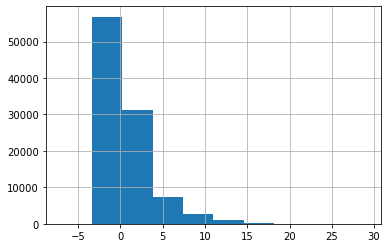

In [8]:
df['Target'].hist()

II.1 Corrélation

In [9]:
df.columns

Index(['sub_id', 'name', 'assists', 'attempted_passes', 'big_chances_created',
       'big_chances_missed', 'bonus', 'bps', 'clean_sheets',
       'clearances_blocks_interceptions', 'completed_passes', 'creativity',
       'dribbles', 'ea_index', 'element', 'errors_leading_to_goal',
       'errors_leading_to_goal_attempt', 'fixture', 'fouls', 'goals_conceded',
       'goals_scored', 'ict_index', 'id', 'influence', 'key_passes',
       'kickoff_time', 'kickoff_time_formatted', 'loaned_in', 'loaned_out',
       'minutes', 'offside', 'open_play_crosses', 'opponent_team', 'own_goals',
       'penalties_conceded', 'penalties_missed', 'penalties_saved',
       'recoveries', 'red_cards', 'round', 'saves', 'selected', 'tackled',
       'tackles', 'target_missed', 'team_a_score', 'team_h_score', 'threat',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'winning_goals', 'yellow_cards', 'GW', 'position', 'team',
       'xP', 'Target'],
      dtype='object'

In [10]:
choix_corr = df[['attempted_passes', 'big_chances_missed', 'target_missed',
        'winning_goals', 'influence', 'key_passes', 'ict_index', 'goals_conceded',
        'completed_passes', 'creativity', 'bps','minutes', 'saves','Target']]


df2 = pd.DataFrame(choix_corr)
df2

,attempted_passes,big_chances_missed,target_missed,winning_goals,influence,key_passes,ict_index,goals_conceded,completed_passes,creativity,bps,minutes,saves,Target
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.1,2,8,0,1.0
1,62.0,1.0,0.0,0.0,25.4,1.0,5.6,2,51.0,13.8,17,90,0,6.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0.0
4,48.0,0.0,2.0,0.0,38.0,1.0,11.4,2,35.0,18.3,23,90,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99591,NaN,NaN,NaN,NaN,18.2,NaN,3.7,3,NaN,19.0,10,90,0,5.0
99592,NaN,NaN,NaN,NaN,18.4,NaN,1.9,3,NaN,0.7,14,90,0,1.0
99593,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0,NaN,0.0,0,0,0,0.0
99594,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0,NaN,0.0,0,0,0,0.0


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99596 entries, 0 to 99595
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attempted_passes    53410 non-null  float64
 1   big_chances_missed  53410 non-null  float64
 2   target_missed       53410 non-null  float64
 3   winning_goals       53410 non-null  float64
 4   influence           99596 non-null  float64
 5   key_passes          53410 non-null  float64
 6   ict_index           99596 non-null  float64
 7   goals_conceded      99596 non-null  int64  
 8   completed_passes    53410 non-null  float64
 9   creativity          99596 non-null  float64
 10  bps                 99596 non-null  int64  
 11  minutes             99596 non-null  int64  
 12  saves               99596 non-null  int64  
 13  Target              99596 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 10.6 MB


In [12]:
#df_cat = df2.select_dtypes(['category']).columns
#df2[df_cat] = df2[df_cat].apply(lambda x: x.cat.codes)
#print(df_cat)

corr_matrix = df2.corr(method='spearman', min_periods=1) #la méthose "Spearman" me paraît la plus pertinente 
                                                                    #pour obtenir des résultats optimaux. 
print(corr_matrix)



                    attempted_passes  big_chances_missed  target_missed  \
attempted_passes            1.000000            0.166553       0.422622   
big_chances_missed          0.166553            1.000000       0.303660   
target_missed               0.422622            0.303660       1.000000   
winning_goals               0.125849            0.101283       0.115133   
influence                   0.914620            0.177219       0.351244   
key_passes                  0.555894            0.185709       0.368733   
ict_index                   0.924500            0.254394       0.471320   
goals_conceded              0.674515            0.110357       0.284251   
completed_passes            0.995181            0.169390       0.427309   
creativity                  0.873269            0.221944       0.478749   
bps                         0.901236            0.088334       0.336968   
minutes                     0.960565            0.183030       0.417737   
saves                    

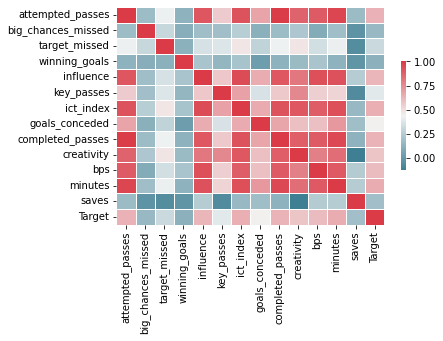

In [13]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
matrix = sns.heatmap(corr_matrix, cmap=cmap, cbar_kws={"shrink": .5}, linewidths=.5)
plt.show()

II.2 Visualisation

array([[<AxesSubplot:title={'center':'attempted_passes'}>,
        <AxesSubplot:title={'center':'big_chances_missed'}>],
       [<AxesSubplot:title={'center':'target_missed'}>,
        <AxesSubplot:title={'center':'winning_goals'}>],
       [<AxesSubplot:title={'center':'influence'}>, <AxesSubplot:>]],
      dtype=object)

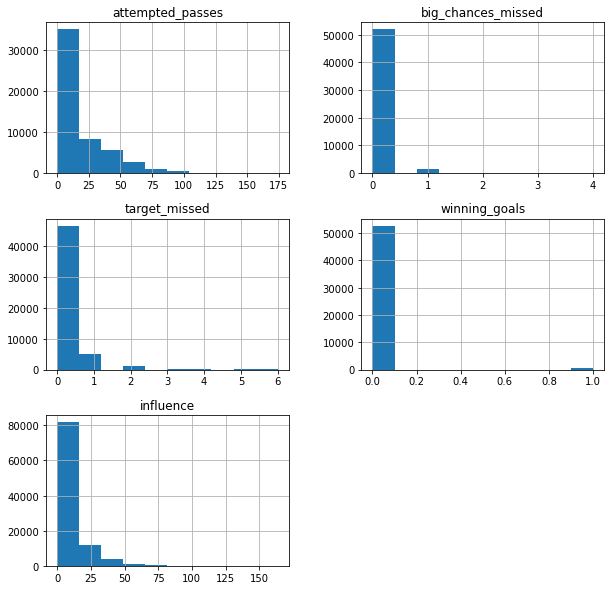

In [14]:
df2[['attempted_passes', 'big_chances_missed', 'target_missed',
        'winning_goals', 'influence',]].hist(figsize=(10,10))

<AxesSubplot:>

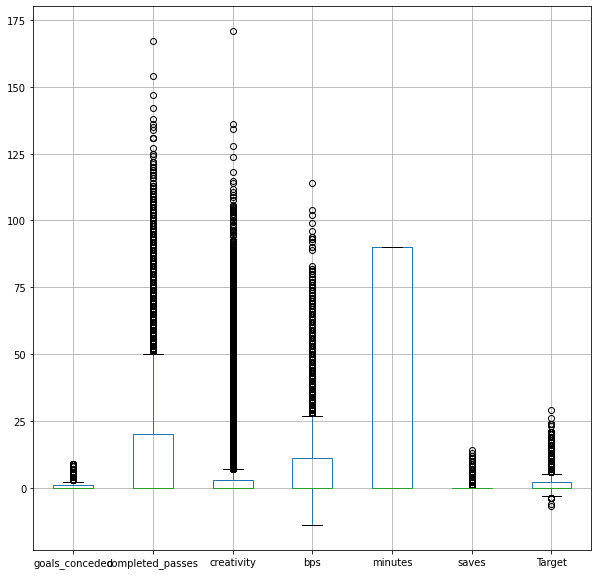

In [15]:
df2[['goals_conceded',
        'completed_passes', 'creativity', 'bps','minutes', 'saves','Target']].boxplot(figsize=(10, 10))

**III. Chargement des données Test**

In [16]:

#DATA_PATH='prdiction-des-points/'

df_test = pd.read_csv('test.csv')

C:\Users\gladi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (26,56,57) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**IV. Concaténation de train et de test**

In [17]:
df_pour_processing=pd.concat([df,df_test])

In [18]:
df_pour_processing

,sub_id,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,...,transfers_out,value,was_home,winning_goals,yellow_cards,GW,position,team,xP,Target
0,0,Leonardo_Ulloa,0,2.0,0.0,0.0,0,2,0,0.0,...,0,60,False,0.0,0,1,NaN,NaN,NaN,1.0
1,1,Christian_Fuchs,0,62.0,0.0,1.0,0,17,0,5.0,...,0,55,False,0.0,1,1,NaN,NaN,NaN,6.0
2,2,Ron-Robert_Zieler,0,0.0,0.0,0.0,0,0,0,0.0,...,0,45,False,0.0,0,1,NaN,NaN,NaN,0.0
3,3,Moses_Odubajo,0,0.0,0.0,0.0,0,0,0,0.0,...,0,45,True,0.0,0,1,NaN,NaN,NaN,0.0
4,4,Riyad_Mahrez,0,48.0,0.0,0.0,1,23,0,0.0,...,0,95,False,0.0,0,1,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24874,24874,Ellery Balcombe,0,NaN,NaN,NaN,0,0,0,NaN,...,18,40,False,NaN,0,22,GK,Brentford,0.0,NaN
24875,24875,Myles Peart-Harris,0,NaN,NaN,NaN,0,0,0,NaN,...,32,45,False,NaN,0,22,MID,Brentford,-1.5,NaN
24876,24876,Jan Zamburek,0,NaN,NaN,NaN,0,0,0,NaN,...,2331,44,False,NaN,0,22,MID,Brentford,0.0,NaN
24877,24877,Álvaro Fernández,0,NaN,NaN,NaN,0,27,0,NaN,...,12853,45,False,NaN,0,22,GK,Brentford,1.9,NaN


**V.Préprocessing**

V.1 Suppression des features dont la corrélation >0.90

In [19]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

<ipython-input-19-7f185152627c>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))


In [20]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)] 
print(); print(to_drop)


['influence', 'ict_index', 'completed_passes', 'creativity', 'bps', 'minutes']


In [21]:
df_pour_processing = df_pour_processing.drop(to_drop, axis=1) 
print(); print(df_pour_processing.head())


   sub_id               name  assists  attempted_passes  big_chances_created  \
0       0     Leonardo_Ulloa        0               2.0                  0.0   
1       1    Christian_Fuchs        0              62.0                  0.0   
2       2  Ron-Robert_Zieler        0               0.0                  0.0   
3       3      Moses_Odubajo        0               0.0                  0.0   
4       4       Riyad_Mahrez        0              48.0                  0.0   

   big_chances_missed  bonus  clean_sheets  clearances_blocks_interceptions  \
0                 0.0      0             0                              0.0   
1                 1.0      0             0                              5.0   
2                 0.0      0             0                              0.0   
3                 0.0      0             0                              0.0   
4                 0.0      1             0                              0.0   

   dribbles  ...  transfers_out  value  was

In [22]:
df_pour_processing.shape

(124475, 54)

V.2  Identification des variables catégorielles & numériques

In [23]:
df_cat = df_pour_processing.select_dtypes(include=['object'])
df_cat.columns

Index(['name', 'kickoff_time', 'kickoff_time_formatted', 'position', 'team'], dtype='object')

In [24]:
df_cat.isna().sum()

name                          0
kickoff_time                  0
kickoff_time_formatted    58060
position                  88309
team                      88309
dtype: int64

In [25]:
df_num = df_pour_processing.select_dtypes(include=['int', 'float'])
df_num.columns

Index(['sub_id', 'assists', 'attempted_passes', 'big_chances_created',
       'big_chances_missed', 'bonus', 'clean_sheets',
       'clearances_blocks_interceptions', 'dribbles', 'ea_index', 'element',
       'errors_leading_to_goal', 'errors_leading_to_goal_attempt', 'fixture',
       'fouls', 'goals_conceded', 'goals_scored', 'id', 'key_passes',
       'loaned_in', 'loaned_out', 'offside', 'open_play_crosses',
       'opponent_team', 'own_goals', 'penalties_conceded', 'penalties_missed',
       'penalties_saved', 'recoveries', 'red_cards', 'round', 'saves',
       'selected', 'tackled', 'tackles', 'target_missed', 'team_a_score',
       'team_h_score', 'threat', 'transfers_balance', 'transfers_in',
       'transfers_out', 'value', 'winning_goals', 'yellow_cards', 'GW', 'xP',
       'Target'],
      dtype='object')

In [26]:
FEATURES = []

NUMERICALS = ['sub_id', 'assists', 'attempted_passes', 'big_chances_created',
       'big_chances_missed', 'bonus', 'bps', 'clean_sheets',
       'clearances_blocks_interceptions', 'completed_passes', 'creativity',
       'dribbles', 'ea_index', 'element', 'errors_leading_to_goal',
       'errors_leading_to_goal_attempt', 'fixture', 'fouls', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'key_passes',
       'loaned_in', 'loaned_out', 'minutes', 'offside', 'open_play_crosses',
       'opponent_team', 'own_goals', 'penalties_conceded', 'penalties_missed',
       'penalties_saved', 'recoveries', 'red_cards', 'round', 'saves',
       'selected', 'tackled', 'tackles', 'target_missed', 'team_a_score',
       'team_h_score', 'threat', 'transfers_balance', 'transfers_in',
       'transfers_out', 'value', 'winning_goals', 'yellow_cards', 'GW', 'xP'
       ]
CATEGORICALS=['name', 'kickoff_time', 'kickoff_time_formatted', 'position', 'team']

Target = df_pour_processing['Target']

FEATURES = NUMERICALS + CATEGORICALS

V.3 Imputation des valeurs manquantes

In [27]:
#pourcentage de valeurs manquantes 
missing_values = df_pour_processing.isnull().sum()
total_missing_values = missing_values.sum()
total_values = np.product(df_pour_processing.shape)
percent_missing = round((total_missing_values/total_values)*100)
print(f'la part de valeurs manquantes est de {percent_missing}%')

la part de valeurs manquantes est de 23%


In [28]:
df_pour_processing.isna().sum()

sub_id                                 0
name                                   0
assists                                0
attempted_passes                   58060
big_chances_created                58060
big_chances_missed                 58060
bonus                                  0
clean_sheets                           0
clearances_blocks_interceptions    58060
dribbles                           58060
ea_index                           58060
element                                0
errors_leading_to_goal             58060
errors_leading_to_goal_attempt     58060
fixture                                0
fouls                              58060
goals_conceded                         0
goals_scored                           0
id                                 58060
key_passes                         58060
kickoff_time                           0
kickoff_time_formatted             58060
loaned_in                          58060
loaned_out                         58060
offside         

In [29]:
## Variable continue ------> Moyenne / Mediane
def median_method_1 (num_var_filled):
    
    moyenne_attempted_passes = df_pour_processing['attempted_passes'].mean()
    df_pour_processing['attempted_passes'] = df_pour_processing['attempted_passes'].fillna(moyenne_attempted_passes)

    mediane_big_chances_created = df_pour_processing['big_chances_created'].median()
    df_pour_processing['big_chances_created'] = df_pour_processing['big_chances_created'].fillna(mediane_big_chances_created)


    mediane_big_chances_missed = df_pour_processing['big_chances_missed'].median()
    df_pour_processing['big_chances_missed'] = df_pour_processing['big_chances_missed'].fillna(mediane_big_chances_missed)

    mediane_clearances_blocks_interceptions = df_pour_processing['clearances_blocks_interceptions'].median()
    df_pour_processing['clearances_blocks_interceptions'] = df_pour_processing['clearances_blocks_interceptions'].fillna(mediane_clearances_blocks_interceptions)

    mediane_dribbles = df_pour_processing['dribbles'].median()
    df_pour_processing['dribbles'] = df_pour_processing['dribbles'].fillna(mediane_dribbles)

    mediane_errors_leading_to_goal = df_pour_processing['errors_leading_to_goal'].median()
    df_pour_processing['errors_leading_to_goal'] = df_pour_processing['errors_leading_to_goal'].fillna(mediane_errors_leading_to_goal)

    mediane_fouls = df_pour_processing['fouls'].median()
    df_pour_processing['fouls'] = df_pour_processing['fouls'].fillna(mediane_fouls)

    mediane_loaned_out=df_pour_processing['loaned_out'].median()
    df_pour_processing['loaned_out'] = df_pour_processing['loaned_out'].fillna(mediane_loaned_out)

    mediane_open_play_crosses=df_pour_processing['open_play_crosses'].median()
    df_pour_processing['open_play_crosses'] = df_pour_processing['open_play_crosses'].fillna(mediane_open_play_crosses)

    mediane_recoveries=df_pour_processing['recoveries'].median()
    df_pour_processing['recoveries'] = df_pour_processing['recoveries'].fillna(mediane_recoveries)

    mediane_tackles=df_pour_processing['tackles'].median()
    df_pour_processing['tackles'] = df_pour_processing['tackles'].fillna(mediane_tackles)

    mediane_team_a_score=df_pour_processing['team_a_score'].median()
    df_pour_processing['team_a_score'] = df_pour_processing['team_a_score'].fillna(mediane_team_a_score)

    mediane_winning_goals=df_pour_processing['winning_goals'].median()
    df_pour_processing['winning_goals'] = df_pour_processing['winning_goals'].fillna(mediane_winning_goals)


    mediane_xP=df_pour_processing['xP'].median()
    df_pour_processing['xP'] = df_pour_processing['xP'].fillna(mediane_xP)

    return num_var_filled


In [30]:
median_method_1(df_pour_processing)

,sub_id,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,clean_sheets,clearances_blocks_interceptions,dribbles,...,transfers_out,value,was_home,winning_goals,yellow_cards,GW,position,team,xP,Target
0,0,Leonardo_Ulloa,0,2.000000,0.0,0.0,0,0,0.0,0.0,...,0,60,False,0.0,0,1,NaN,NaN,0.5,1.0
1,1,Christian_Fuchs,0,62.000000,0.0,1.0,0,0,5.0,0.0,...,0,55,False,0.0,1,1,NaN,NaN,0.5,6.0
2,2,Ron-Robert_Zieler,0,0.000000,0.0,0.0,0,0,0.0,0.0,...,0,45,False,0.0,0,1,NaN,NaN,0.5,0.0
3,3,Moses_Odubajo,0,0.000000,0.0,0.0,0,0,0.0,0.0,...,0,45,True,0.0,0,1,NaN,NaN,0.5,0.0
4,4,Riyad_Mahrez,0,48.000000,0.0,0.0,1,0,0.0,2.0,...,0,95,False,0.0,0,1,NaN,NaN,0.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24874,24874,Ellery Balcombe,0,15.169043,0.0,0.0,0,0,0.0,0.0,...,18,40,False,0.0,0,22,GK,Brentford,0.0,NaN
24875,24875,Myles Peart-Harris,0,15.169043,0.0,0.0,0,0,0.0,0.0,...,32,45,False,0.0,0,22,MID,Brentford,-1.5,NaN
24876,24876,Jan Zamburek,0,15.169043,0.0,0.0,0,0,0.0,0.0,...,2331,44,False,0.0,0,22,MID,Brentford,0.0,NaN
24877,24877,Álvaro Fernández,0,15.169043,0.0,0.0,0,0,0.0,0.0,...,12853,45,False,0.0,0,22,GK,Brentford,1.9,NaN


In [31]:
df_pour_processing.isna().sum()

sub_id                                 0
name                                   0
assists                                0
attempted_passes                       0
big_chances_created                    0
big_chances_missed                     0
bonus                                  0
clean_sheets                           0
clearances_blocks_interceptions        0
dribbles                               0
ea_index                           58060
element                                0
errors_leading_to_goal                 0
errors_leading_to_goal_attempt     58060
fixture                                0
fouls                                  0
goals_conceded                         0
goals_scored                           0
id                                 58060
key_passes                         58060
kickoff_time                           0
kickoff_time_formatted             58060
loaned_in                          58060
loaned_out                             0
offside         

In [32]:
def median_method_2 (num_var_filled2):

    mediane_ea_index= df_pour_processing['ea_index'].median()
    df_pour_processing['ea_index'] = df_pour_processing['ea_index'].fillna(mediane_ea_index)
    #df_pour_processing['ea_index'].isna().sum()

    #df_pour_processing['errors_leading_to_goal_attempt'].hist()
    #df_pour_processing['errors_leading_to_goal_attempt'].dtype

    mediane_errors_leading_to_goal_attempt= df_pour_processing['errors_leading_to_goal_attempt'].median()
    df_pour_processing['errors_leading_to_goal_attempt'] = df_pour_processing['errors_leading_to_goal_attempt'].fillna(mediane_errors_leading_to_goal_attempt)
    df_pour_processing['errors_leading_to_goal_attempt'].isna().sum()

    #df_pour_processing['key_passes'].dtype

    mediane_key_passes= df_pour_processing['key_passes'].median()
    df_pour_processing['key_passes'] = df_pour_processing['key_passes'].fillna(mediane_key_passes)
    #df_pour_processing['key_passes'].isna().sum()

    #df_pour_processing['loaned_in'].hist()

    mediane_loaned_in= df_pour_processing['loaned_in'].median()
    df_pour_processing['loaned_in'] = df_pour_processing['loaned_in'].fillna(mediane_loaned_in)
    #df_pour_processing['loaned_in'].isna().sum()


    #df_pour_processing['offside'].hist()

    mediane_offside= df_pour_processing['offside'].median()
    df_pour_processing['offside'] = df_pour_processing['offside'].fillna(mediane_offside)
    df_pour_processing['offside'].isna().sum()

    #df_pour_processing['penalties_conceded'].hist()

    mediane_penalties_conceded= df_pour_processing['penalties_conceded'].median()
    df_pour_processing['penalties_conceded'] = df_pour_processing['penalties_conceded'].fillna(mediane_penalties_conceded)
    #df_pour_processing['penalties_conceded'].isna().sum()


    #df_pour_processing['tackled'].hist()

    mediane_tackled= df_pour_processing['tackled'].median()
    df_pour_processing['tackled'] = df_pour_processing['tackled'].fillna(mediane_tackled)
    #df_pour_processing['tackled'].isna().sum()

    #df_pour_processing['target_missed'].median()

    mediane_target_missed= df_pour_processing['target_missed'].median()
    df_pour_processing['target_missed'] = df_pour_processing['target_missed'].fillna(mediane_target_missed)
    #df_pour_processing['target_missed'].isna().sum()

    #df_pour_processing['team_h_score'].median() #varible intéressante pour analyse

    mediane_team_h_score= df_pour_processing['team_h_score'].median()
    df_pour_processing['team_h_score'] = df_pour_processing['team_h_score'].fillna(mediane_team_h_score)
    #df_pour_processing['team_h_score'].isna().sum()

    mediane_Target= df_pour_processing['Target'].median()
    df_pour_processing['Target'] = df_pour_processing['Target'].fillna(mediane_Target)

    return num_var_filled2


In [33]:
median_method_2(df_pour_processing)

,sub_id,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,clean_sheets,clearances_blocks_interceptions,dribbles,...,transfers_out,value,was_home,winning_goals,yellow_cards,GW,position,team,xP,Target
0,0,Leonardo_Ulloa,0,2.000000,0.0,0.0,0,0,0.0,0.0,...,0,60,False,0.0,0,1,NaN,NaN,0.5,1.0
1,1,Christian_Fuchs,0,62.000000,0.0,1.0,0,0,5.0,0.0,...,0,55,False,0.0,1,1,NaN,NaN,0.5,6.0
2,2,Ron-Robert_Zieler,0,0.000000,0.0,0.0,0,0,0.0,0.0,...,0,45,False,0.0,0,1,NaN,NaN,0.5,0.0
3,3,Moses_Odubajo,0,0.000000,0.0,0.0,0,0,0.0,0.0,...,0,45,True,0.0,0,1,NaN,NaN,0.5,0.0
4,4,Riyad_Mahrez,0,48.000000,0.0,0.0,1,0,0.0,2.0,...,0,95,False,0.0,0,1,NaN,NaN,0.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24874,24874,Ellery Balcombe,0,15.169043,0.0,0.0,0,0,0.0,0.0,...,18,40,False,0.0,0,22,GK,Brentford,0.0,0.0
24875,24875,Myles Peart-Harris,0,15.169043,0.0,0.0,0,0,0.0,0.0,...,32,45,False,0.0,0,22,MID,Brentford,-1.5,0.0
24876,24876,Jan Zamburek,0,15.169043,0.0,0.0,0,0,0.0,0.0,...,2331,44,False,0.0,0,22,MID,Brentford,0.0,0.0
24877,24877,Álvaro Fernández,0,15.169043,0.0,0.0,0,0,0.0,0.0,...,12853,45,False,0.0,0,22,GK,Brentford,1.9,0.0


In [34]:
df_pour_processing.isna().sum()

sub_id                                 0
name                                   0
assists                                0
attempted_passes                       0
big_chances_created                    0
big_chances_missed                     0
bonus                                  0
clean_sheets                           0
clearances_blocks_interceptions        0
dribbles                               0
ea_index                               0
element                                0
errors_leading_to_goal                 0
errors_leading_to_goal_attempt         0
fixture                                0
fouls                                  0
goals_conceded                         0
goals_scored                           0
id                                 58060
key_passes                             0
kickoff_time                           0
kickoff_time_formatted             58060
loaned_in                              0
loaned_out                             0
offside         

In [35]:
CATEGORICALS

['name', 'kickoff_time', 'kickoff_time_formatted', 'position', 'team']

Text(0.5, 1.0, 'BoxPlot Target/team')

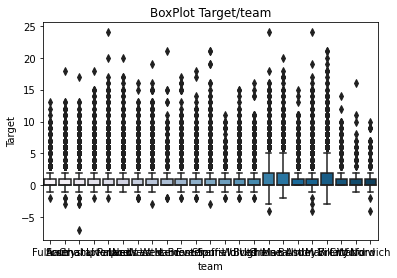

In [36]:
sns.boxplot(data=df_pour_processing, x='team', y='Target', palette='PuBu').set_title('BoxPlot Target/team')

Text(0.5, 1.0, 'BoxPlot Target/team')

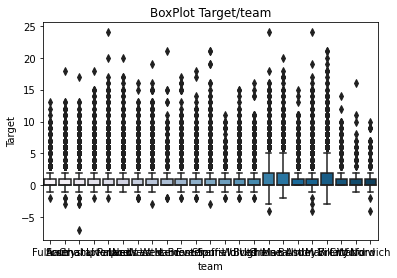

In [37]:
sns.boxplot(data=df_pour_processing, x='team', y='Target', palette='PuBu').set_title('BoxPlot Target/team')

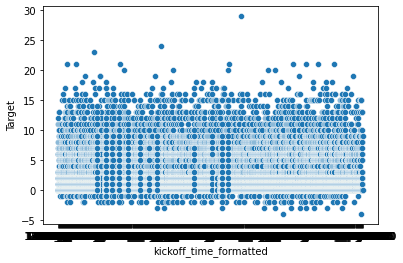

In [38]:
#Scatterpblot
ax = sns.scatterplot(x="kickoff_time_formatted", y="Target", data=df_pour_processing)

In [39]:
df_pour_processing = df_pour_processing.drop(['id', 'kickoff_time_formatted', 'position', 'team'], axis=1)

In [40]:
df_pour_processing.head()

,sub_id,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,clean_sheets,clearances_blocks_interceptions,dribbles,...,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards,GW,xP,Target
0,0,Leonardo_Ulloa,0,2.0,0.0,0.0,0,0,0.0,0.0,...,0,0,0,60,False,0.0,0,1,0.5,1.0
1,1,Christian_Fuchs,0,62.0,0.0,1.0,0,0,5.0,0.0,...,0,0,0,55,False,0.0,1,1,0.5,6.0
2,2,Ron-Robert_Zieler,0,0.0,0.0,0.0,0,0,0.0,0.0,...,0,0,0,45,False,0.0,0,1,0.5,0.0
3,3,Moses_Odubajo,0,0.0,0.0,0.0,0,0,0.0,0.0,...,0,0,0,45,True,0.0,0,1,0.5,0.0
4,4,Riyad_Mahrez,0,48.0,0.0,0.0,1,0,0.0,2.0,...,0,0,0,95,False,0.0,0,1,0.5,3.0


In [41]:
#pourcentage de valeurs manquantes 
missing_values = df_pour_processing.isnull().sum()
total_missing_values = missing_values.sum()
total_values = np.product(df_pour_processing.shape)
percent_missing = round((total_missing_values/total_values)*100)
print(f'la part de valeurs manquantes est de {percent_missing}%')

la part de valeurs manquantes est de 0%


 Imputation des valeurs aberrantes

V.4 Mise à jour des variables catégorielles & numériques

In [42]:
df_cat = df_pour_processing.select_dtypes(include=['object'])
df_cat.columns

Index(['name', 'kickoff_time'], dtype='object')

In [43]:
df_cat.isna().sum()

name            0
kickoff_time    0
dtype: int64

In [44]:
df_num = df_pour_processing.select_dtypes(include=['int', 'float'])
df_num.columns

Index(['sub_id', 'assists', 'attempted_passes', 'big_chances_created',
       'big_chances_missed', 'bonus', 'clean_sheets',
       'clearances_blocks_interceptions', 'dribbles', 'ea_index', 'element',
       'errors_leading_to_goal', 'errors_leading_to_goal_attempt', 'fixture',
       'fouls', 'goals_conceded', 'goals_scored', 'key_passes', 'loaned_in',
       'loaned_out', 'offside', 'open_play_crosses', 'opponent_team',
       'own_goals', 'penalties_conceded', 'penalties_missed',
       'penalties_saved', 'recoveries', 'red_cards', 'round', 'saves',
       'selected', 'tackled', 'tackles', 'target_missed', 'team_a_score',
       'team_h_score', 'threat', 'transfers_balance', 'transfers_in',
       'transfers_out', 'value', 'winning_goals', 'yellow_cards', 'GW', 'xP',
       'Target'],
      dtype='object')

In [45]:
FEATURES=[]

NUMERICALS=['sub_id', 'assists', 'attempted_passes', 'big_chances_created',
       'big_chances_missed', 'bonus', 'clean_sheets',
       'clearances_blocks_interceptions', 'dribbles', 'ea_index', 'element',
       'errors_leading_to_goal', 'errors_leading_to_goal_attempt', 'fixture',
       'fouls', 'goals_conceded', 'goals_scored', 'key_passes', 'loaned_in',
       'loaned_out', 'offside', 'open_play_crosses', 'opponent_team',
       'own_goals', 'penalties_conceded', 'penalties_missed',
       'penalties_saved', 'recoveries', 'red_cards', 'round', 'saves',
       'selected', 'tackled', 'tackles', 'target_missed', 'team_a_score',
       'team_h_score', 'threat', 'transfers_balance', 'transfers_in',
       'transfers_out', 'value', 'winning_goals', 'yellow_cards', 'GW', 'xP'
       ]
CATEGORICALS=['name', 'kickoff_time']

Target=df_pour_processing['Target']

FEATURES = NUMERICALS + CATEGORICALS

V.5 Standardisation

In [46]:
#--------------------Appliquer le scaler sur un sample---------------------#

scaler = preprocessing.StandardScaler().fit(df_pour_processing[NUMERICALS].head(1000))
scaler.transform(df_pour_processing[NUMERICALS].head(1000))
print("Moyenne de chaque variable sur 1000 premières observations")
scaler.transform(df_pour_processing[NUMERICALS].head(1000)).mean(axis=0)
print("Ecart-type de chaque variable sur 1000 premières observations")
scaler.transform(df_pour_processing[NUMERICALS].head(1000)).std(axis=0)

Moyenne de chaque variable sur 1000 premières observations
Ecart-type de chaque variable sur 1000 premières observations


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.])

C:\Users\gladi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gladi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


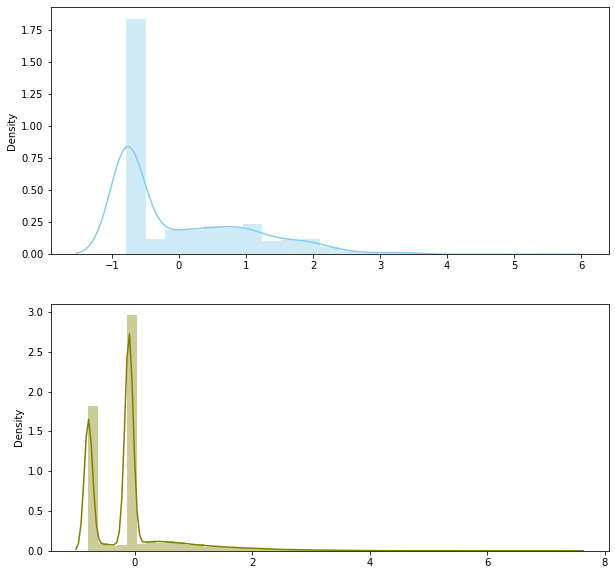

In [47]:
#--------------------Appliquer le scaler à toutes les autres lignes---------------------#

X1 = scaler.transform(df_pour_processing[NUMERICALS].head(1000))
X2 = scaler.transform(df_pour_processing[NUMERICALS][1000:])
col_pos = df_pour_processing[NUMERICALS].columns.get_loc("attempted_passes")
# X2.mean(axis = 0)
# X2.std(axis = 0)
f, axes = plt.subplots(2, figsize=(10, 10))
sns.distplot(X2[:,col_pos] , color="olive", ax=axes[1])
sns.distplot(X1[:,col_pos] , color="skyblue", ax=axes[0])
plt.savefig('standardisation.png', bbox_inches='tight')

V.6 Normalisation

C:\Users\gladi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gladi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


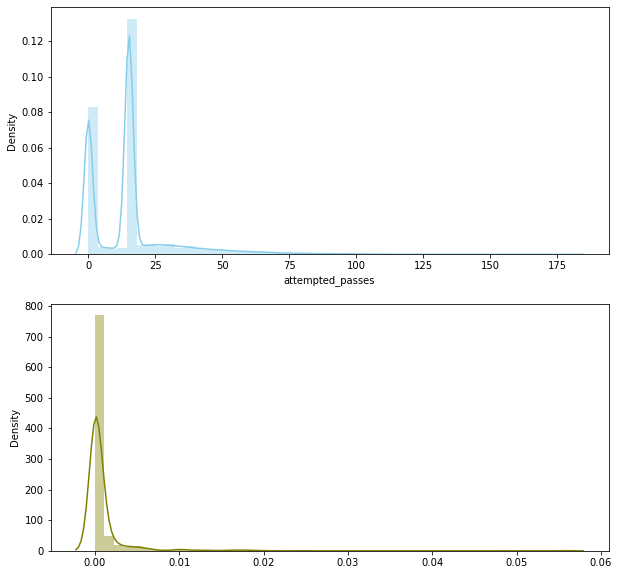

In [48]:
scaler = preprocessing.Normalizer().fit(df_pour_processing[NUMERICALS].dropna(how = "any").head(1000))
X1 = scaler.transform(df_pour_processing[NUMERICALS].dropna(how = "any").head(1000))
f, axes = plt.subplots(2, figsize=(10, 10))
sns.distplot(df_pour_processing["attempted_passes"] , color="skyblue", ax=axes[0])
sns.distplot(X1[:,col_pos] , color="olive", ax=axes[1])
plt.savefig('normalisation.png', bbox_inches='tight')

In [49]:
# Vérification que la norme L2 est bien égale à 1
np.sqrt(np.sum(X1**2, axis=1))[:5] # L2-norm

array([1., 1., 1., 1., 1.])

V.7 Transformation des variables catégorielles

In [50]:
data_dummies= pd.get_dummies(df_pour_processing[CATEGORICALS].astype('category'))
data_dummies.sample(5)

,name_Aaron Connolly,name_Aaron Cresswell,name_Aaron Lennon,name_Aaron Mooy,name_Aaron Ramsdale,name_Aaron Ramsey,name_Aaron Wan-Bissaka,name_Aaron_Connolly_534,name_Aaron_Cresswell,name_Aaron_Cresswell_376,...,kickoff_time_2022-01-01 17:30:00+00:00,kickoff_time_2022-01-02 14:00:00+00:00,kickoff_time_2022-01-02 16:30:00+00:00,kickoff_time_2022-01-03 17:30:00+00:00,kickoff_time_2022-01-11 19:45:00+00:00,kickoff_time_2022-01-12 19:45:00+00:00,kickoff_time_2022-01-14 20:00:00+00:00,kickoff_time_2022-01-15 12:30:00+00:00,kickoff_time_2022-01-15 17:30:00+00:00,kickoff_time_2022-01-16 14:00:00+00:00
4978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
data_dummies.columns

Index(['name_Aaron Connolly', 'name_Aaron Cresswell', 'name_Aaron Lennon',
       'name_Aaron Mooy', 'name_Aaron Ramsdale', 'name_Aaron Ramsey',
       'name_Aaron Wan-Bissaka', 'name_Aaron_Connolly_534',
       'name_Aaron_Cresswell', 'name_Aaron_Cresswell_376',
       ...
       'kickoff_time_2022-01-01 17:30:00+00:00',
       'kickoff_time_2022-01-02 14:00:00+00:00',
       'kickoff_time_2022-01-02 16:30:00+00:00',
       'kickoff_time_2022-01-03 17:30:00+00:00',
       'kickoff_time_2022-01-11 19:45:00+00:00',
       'kickoff_time_2022-01-12 19:45:00+00:00',
       'kickoff_time_2022-01-14 20:00:00+00:00',
       'kickoff_time_2022-01-15 12:30:00+00:00',
       'kickoff_time_2022-01-15 17:30:00+00:00',
       'kickoff_time_2022-01-16 14:00:00+00:00'],
      dtype='object', length=4426)

In [52]:
CATEGORICALS = data_dummies.columns
len(CATEGORICALS)

4426

In [53]:
df_pour_processing[CATEGORICALS] = data_dummies[CATEGORICALS]

C:\Users\gladi\anaconda3\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


In [54]:
FEATURES = list(CATEGORICALS) + NUMERICALS

In [55]:
FEATURES

['name_Aaron Connolly',
 'name_Aaron Cresswell',
 'name_Aaron Lennon',
 'name_Aaron Mooy',
 'name_Aaron Ramsdale',
 'name_Aaron Ramsey',
 'name_Aaron Wan-Bissaka',
 'name_Aaron_Connolly_534',
 'name_Aaron_Cresswell',
 'name_Aaron_Cresswell_376',
 'name_Aaron_Cresswell_402',
 'name_Aaron_Lennon',
 'name_Aaron_Lennon_430',
 'name_Aaron_Lennon_83',
 'name_Aaron_Mooy',
 'name_Aaron_Mooy_199',
 'name_Aaron_Mooy_516',
 'name_Aaron_Ramsdale',
 'name_Aaron_Ramsdale_494',
 'name_Aaron_Ramsey',
 'name_Aaron_Ramsey_14',
 'name_Aaron_Rowe_607',
 'name_Aaron_Wan-Bissaka',
 'name_Aaron_Wan-Bissaka_122',
 'name_Aaron_Wan-Bissaka_145',
 'name_Abd-Al-Ali Morakinyo Olaposi_Koiki_564',
 'name_Abd-Al-Ali Morakinyo Olaposi_Koiki_596',
 'name_Abdelhamid_Sabiri',
 'name_Abdelhamid_Sabiri_205',
 'name_Abdoulaye Doucouré',
 'name_Abdoulaye_Doucouré_368',
 'name_Abdoulaye_Doucour�',
 'name_Abdoulaye_Doucour�_390',
 'name_Abdul Rahman_Baba',
 'name_Abel_Hern�ndez',
 'name_Aboubakar Kamara',
 'name_Aboubakar_Kama

In [56]:
df_pour_processing.sample(2)

,sub_id,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,clean_sheets,clearances_blocks_interceptions,dribbles,...,kickoff_time_2022-01-01 17:30:00+00:00,kickoff_time_2022-01-02 14:00:00+00:00,kickoff_time_2022-01-02 16:30:00+00:00,kickoff_time_2022-01-03 17:30:00+00:00,kickoff_time_2022-01-11 19:45:00+00:00,kickoff_time_2022-01-12 19:45:00+00:00,kickoff_time_2022-01-14 20:00:00+00:00,kickoff_time_2022-01-15 12:30:00+00:00,kickoff_time_2022-01-15 17:30:00+00:00,kickoff_time_2022-01-16 14:00:00+00:00
85977,85977,Max Lowe,0,15.169043,0.0,0.0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
90785,90785,Aaron Cresswell,1,15.169043,0.0,0.0,1,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


**VI. Stratégie de validation**

In [57]:
df.shape
df_preprocesse=df_pour_processing
#Target= df_preprocesse['Target']
df_preprocesse['Target']=Target
df_preprocesse.shape


(124475, 4476)

In [58]:
df_pour_processing

,sub_id,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,clean_sheets,clearances_blocks_interceptions,dribbles,...,kickoff_time_2022-01-01 17:30:00+00:00,kickoff_time_2022-01-02 14:00:00+00:00,kickoff_time_2022-01-02 16:30:00+00:00,kickoff_time_2022-01-03 17:30:00+00:00,kickoff_time_2022-01-11 19:45:00+00:00,kickoff_time_2022-01-12 19:45:00+00:00,kickoff_time_2022-01-14 20:00:00+00:00,kickoff_time_2022-01-15 12:30:00+00:00,kickoff_time_2022-01-15 17:30:00+00:00,kickoff_time_2022-01-16 14:00:00+00:00
0,0,Leonardo_Ulloa,0,2.000000,0.0,0.0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,Christian_Fuchs,0,62.000000,0.0,1.0,0,0,5.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,Ron-Robert_Zieler,0,0.000000,0.0,0.0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,Moses_Odubajo,0,0.000000,0.0,0.0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,Riyad_Mahrez,0,48.000000,0.0,0.0,1,0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24874,24874,Ellery Balcombe,0,15.169043,0.0,0.0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
24875,24875,Myles Peart-Harris,0,15.169043,0.0,0.0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
24876,24876,Jan Zamburek,0,15.169043,0.0,0.0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
24877,24877,Álvaro Fernández,0,15.169043,0.0,0.0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
#df_preprocesse['Target']

In [60]:
df_train = df_preprocesse.iloc[:df.shape[0],:]
#Target
df_test = df_preprocesse.iloc[-df_test.shape[0]:,:]
#Target

In [61]:
df_test

,sub_id,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,clean_sheets,clearances_blocks_interceptions,dribbles,...,kickoff_time_2022-01-01 17:30:00+00:00,kickoff_time_2022-01-02 14:00:00+00:00,kickoff_time_2022-01-02 16:30:00+00:00,kickoff_time_2022-01-03 17:30:00+00:00,kickoff_time_2022-01-11 19:45:00+00:00,kickoff_time_2022-01-12 19:45:00+00:00,kickoff_time_2022-01-14 20:00:00+00:00,kickoff_time_2022-01-15 12:30:00+00:00,kickoff_time_2022-01-15 17:30:00+00:00,kickoff_time_2022-01-16 14:00:00+00:00
0,0,Robert_Snodgrass,0,33.000000,0.0,0.0,3,0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,1,Robert_Huth,0,0.000000,0.0,0.0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,Jarrod_Bowen,0,0.000000,0.0,0.0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,Allan_McGregor,0,0.000000,0.0,0.0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,Benjamin_Chilwell,0,0.000000,0.0,0.0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24874,24874,Ellery Balcombe,0,15.169043,0.0,0.0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
24875,24875,Myles Peart-Harris,0,15.169043,0.0,0.0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
24876,24876,Jan Zamburek,0,15.169043,0.0,0.0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
24877,24877,Álvaro Fernández,0,15.169043,0.0,0.0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
df_test=df_test.drop(["Target"], axis=1)
df_test.head()

,sub_id,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,clean_sheets,clearances_blocks_interceptions,dribbles,...,kickoff_time_2022-01-01 17:30:00+00:00,kickoff_time_2022-01-02 14:00:00+00:00,kickoff_time_2022-01-02 16:30:00+00:00,kickoff_time_2022-01-03 17:30:00+00:00,kickoff_time_2022-01-11 19:45:00+00:00,kickoff_time_2022-01-12 19:45:00+00:00,kickoff_time_2022-01-14 20:00:00+00:00,kickoff_time_2022-01-15 12:30:00+00:00,kickoff_time_2022-01-15 17:30:00+00:00,kickoff_time_2022-01-16 14:00:00+00:00
0,0,Robert_Snodgrass,0,33.0,0.0,0.0,3,0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,1,Robert_Huth,0,0.0,0.0,0.0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,Jarrod_Bowen,0,0.0,0.0,0.0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,Allan_McGregor,0,0.0,0.0,0.0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,Benjamin_Chilwell,0,0.0,0.0,0.0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
NFOLD = 4

kf = KFold(n_splits=NFOLD,shuffle=True,random_state=2021)
#split = list(kf.split(df_train[FEATURES],Target))
split = list(kf.split(df_train[FEATURES],df_train['Target']))

for i,(train_index, test_index) in enumerate(split):
    df_train.loc[test_index,'fold'] = i+1
    
df_train['fold'] = df_train['fold'].astype(int)

C:\Users\gladi\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\gladi\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-63-e37ce5050f23>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [64]:
df_train['fold'].value_counts()

2    24899
4    24899
1    24899
3    24899
Name: fold, dtype: int64

**VII.Modélisation**

RandomForestRegressor

In [65]:

model_rf = []

MAE_scores_rf=[]

features = FEATURES

for fold in range(1,NFOLD+1):
    print(f'\n ---------------- Fold {fold} ------------\n')
    
    ## Echantillon train test
    
    dtrain = df_train[df_train.fold!=fold]
    dval = df_train[df_train.fold==fold]
        
    print(f" -------------- Training on {len(dtrain)} samples-------------- ")
    print(f" -------------- Validation on {len(dval)} samples-------------- ")
    
    
    ## Definition et Apprentissage du model
    
    #Definition et Apprentissage du model foret aléatoire
    
    clf = RandomForestRegressor(n_estimators=10, random_state=1)
    clf.fit(dtrain[features], dtrain['Target'])
 
    # Save model
    model_rf.append(clf)
    
    # Predire sur validation

    y_pred_val_rf = clf.predict(dval[features])

    y_pred_train_rf = clf.predict(dtrain[features])

    # Fonction de perte
    
    # metrics de performances
    
    mae_train_rf = mean_absolute_error(dtrain['Target'],y_pred_train_rf)
    mae_val_rf = mean_absolute_error(dval['Target'],y_pred_val_rf)

    print(f"MAE rf Train: {mae_train_rf}  ; MAE rf VAL : {mae_val_rf}")

    MAE_scores_rf.append(mae_val_rf)


 ---------------- Fold 1 ------------

 -------------- Training on 74697 samples-------------- 
 -------------- Validation on 24899 samples-------------- 
MAE rf Train: 0.46046561441557216  ; MAE rf VAL : 1.1903690911281577

 ---------------- Fold 2 ------------

 -------------- Training on 74697 samples-------------- 
 -------------- Validation on 24899 samples-------------- 
MAE rf Train: 0.46215912285633964  ; MAE rf VAL : 1.2035503433872845

 ---------------- Fold 3 ------------

 -------------- Training on 74697 samples-------------- 
 -------------- Validation on 24899 samples-------------- 
MAE rf Train: 0.4631123070538308  ; MAE rf VAL : 1.1965179324470863

 ---------------- Fold 4 ------------

 -------------- Training on 74697 samples-------------- 
 -------------- Validation on 24899 samples-------------- 
MAE rf Train: 0.46177892017082356  ; MAE rf VAL : 1.1731796457689063


In [66]:
min_scores=min(MAE_scores_rf)
c=0
best_model= RandomForestRegressor()

for mae_scores in MAE_scores_rf:
    if mae_scores == min_scores:
       #best_model=models[c]
       best_model=model_rf[c]
       print(c)
       #print('best')
    else:
        print("pas le meilleur modèle")
    c=c+1


pas le meilleur modèle
pas le meilleur modèle
pas le meilleur modèle
3


In [67]:
#----------Amélioration modèle ----------#

parameters = {
    'n_estimators': [5, 10],
    #'max_depth': [2,4],
}
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters)
clf.fit(dtrain[features], dtrain['Target'])

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'n_estimators': [5, 10]})

In [68]:
print(" Résultat du Grid Search ")
print("\n Le nombre d'estimators optimal:\n",clf.best_estimator_)
print("\n Le meilleur score obtenu:\n",clf.best_score_)
print("\n Les meilleurs paramètres:\n",clf.best_params_)

 Résultat du Grid Search 

 Le nombre d'estimators optimal:
 RandomForestRegressor(n_estimators=10, random_state=0)

 Le meilleur score obtenu:
 0.14929494530018922

 Les meilleurs paramètres:
 {'n_estimators': 10}


In [69]:
#Entraînement modèle avec les données Grid search

model_rf = []

MAE_scores_rf=[]

features = FEATURES

for fold in range(1,NFOLD+1):
    print(f'\n ---------------- Fold {fold} ------------\n')
    
    ## Echantillon train test
    
    dtrain = df_train[df_train.fold!=fold]
    dval = df_train[df_train.fold==fold]
        
    print(f" -------------- Training on {len(dtrain)} samples-------------- ")
    print(f" -------------- Validation on {len(dval)} samples-------------- ")
    
    
    ## Definition et Apprentissage du model
    
    #Definition et Apprentissage du model foret aléatoire
    
    clf = RandomForestRegressor(n_estimators=10, random_state=0)
    clf.fit(dtrain[features], dtrain['Target'])
 
    # Save model
    model_rf.append(clf)
    
    # Predire sur validation

    y_pred_val_rf = clf.predict(dval[features])

    y_pred_train_rf = clf.predict(dtrain[features])

    # Fonction de perte
    
    # metrics de performances
    
    mae_train_rf = mean_absolute_error(dtrain['Target'],y_pred_train_rf)
    mae_val_rf = mean_absolute_error(dval['Target'],y_pred_val_rf)

    print(f"MAE rf Train: {mae_train_rf}  ; MAE rf VAL : {mae_val_rf}")

    MAE_scores_rf.append(mae_val_rf)


 ---------------- Fold 1 ------------

 -------------- Training on 74697 samples-------------- 
 -------------- Validation on 24899 samples-------------- 
MAE rf Train: 0.4617213542712558  ; MAE rf VAL : 1.192268765813888

 ---------------- Fold 2 ------------

 -------------- Training on 74697 samples-------------- 
 -------------- Validation on 24899 samples-------------- 
MAE rf Train: 0.45623385142642936  ; MAE rf VAL : 1.2019077071368327

 ---------------- Fold 3 ------------

 -------------- Training on 74697 samples-------------- 
 -------------- Validation on 24899 samples-------------- 
MAE rf Train: 0.4595097527343802  ; MAE rf VAL : 1.1896180569500785

 ---------------- Fold 4 ------------

 -------------- Training on 74697 samples-------------- 
 -------------- Validation on 24899 samples-------------- 
MAE rf Train: 0.46042946838561116  ; MAE rf VAL : 1.1755170890397204


In [70]:
min_scores=min(MAE_scores_rf)
c=0
best_model_rf= RandomForestRegressor()

for mae_scores in MAE_scores_rf:
    if mae_scores == min_scores:
       Grid_rf=model_rf[c]
       print(c)
       #print('best')
    else:
        print("pas le meilleur modèle")
    c=c+1

pas le meilleur modèle
pas le meilleur modèle
pas le meilleur modèle
3


Variables importance

In [71]:
features_names=Grid_rf.feature_names_in_
len(features_names)

4472

In [72]:
importances = Grid_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in Grid_rf.estimators_], axis=0)

forest_importances = pd.Series(importances[importances>0], index=features_names[importances>0])
forest_importances
forest_importances.sort_values
#fig, ax = plt.subplots()
#forest_importances.plot.bar(yerr=std[importances>0], ax=ax)
#ax.set_title("Feature importances using MDI")
#ax.set_ylabel("Mean decrease in impurity")

#fig.tight_layout()

<bound method Series.sort_values of name_Aaron Cresswell       0.000375
name_Aaron Lennon          0.000062
name_Aaron Ramsdale        0.000099
name_Aaron Wan-Bissaka     0.000101
name_Aaron_Connolly_534    0.000194
                             ...   
value                      0.054165
winning_goals              0.000476
yellow_cards               0.001722
GW                         0.006411
xP                         0.009125
Length: 3238, dtype: float64>

In [73]:
len(forest_importances)

3238

Ridge Regression

In [74]:
MAE_scores_Ridge=[]

df_resultat_Ridge= []

features = FEATURES

for fold in range(1,NFOLD+1):
    print(f'\n ---------------- Fold {fold} ------------\n')
    
    ## Echantillon train test
    
    dtrain = df_train[df_train.fold!=fold]
    dval = df_train[df_train.fold==fold]
        
    print(f" -------------- Training on {len(dtrain)} samples-------------- ")
    print(f" -------------- Validation on {len(dval)} samples-------------- ")


    n_alphas = 1
    alphas = np.arange(0,n_alphas,0.5) #avec alpha le pénalisant

    for alpha in tqdm_notebook(alphas):
        reg_Ridge = Ridge(alpha=alpha).fit(dtrain[FEATURES],dtrain['Target'])

        #prediction

        y_pred_val_Ridge = reg_Ridge.predict(dval[features])
        y_pred_train_Ridge = reg_Ridge.predict(dtrain[features])
        df_resultat_Ridge.append(reg_Ridge)

        ##Fonction de perte 
        #Metric de performance 
        
        mae_train_Ridge = mean_absolute_error(dtrain['Target'],y_pred_train_Ridge)
        mae_val_Ridge= mean_absolute_error(dval['Target'],y_pred_val_Ridge)

        print(f"MAE rf Train: {mae_train_Ridge}  ; MAE rf VAL : {mae_val_Ridge}")

        MAE_scores_Ridge.append(mae_val_Ridge)




 ---------------- Fold 1 ------------

 -------------- Training on 74697 samples-------------- 
 -------------- Validation on 24899 samples-------------- 


  0%|          | 0/2 [00:00<?, ?it/s]

MAE rf Train: 108759.89899622371  ; MAE rf VAL : 14725461113.742666


C:\Users\gladi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.78963e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


MAE rf Train: 1.2313429797919315  ; MAE rf VAL : 1.2985612275256424

 ---------------- Fold 2 ------------

 -------------- Training on 74697 samples-------------- 
 -------------- Validation on 24899 samples-------------- 


  0%|          | 0/2 [00:00<?, ?it/s]

MAE rf Train: 2633.363247722316  ; MAE rf VAL : 34352017445.47775


C:\Users\gladi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.72857e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


MAE rf Train: 1.2270836874911173  ; MAE rf VAL : 1.3049819221191483

 ---------------- Fold 3 ------------

 -------------- Training on 74697 samples-------------- 
 -------------- Validation on 24899 samples-------------- 


  0%|          | 0/2 [00:00<?, ?it/s]

MAE rf Train: 952.9752347050469  ; MAE rf VAL : 12473173310.121712


C:\Users\gladi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.71485e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


MAE rf Train: 1.2334607680790797  ; MAE rf VAL : 1.2912922570845102

 ---------------- Fold 4 ------------

 -------------- Training on 74697 samples-------------- 
 -------------- Validation on 24899 samples-------------- 


  0%|          | 0/2 [00:00<?, ?it/s]

MAE rf Train: 4972.217619829047  ; MAE rf VAL : 12570503209.773802


C:\Users\gladi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.75348e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


MAE rf Train: 1.2339915176280298  ; MAE rf VAL : 1.284872265373161


In [75]:
min_scores=min(MAE_scores_Ridge)
c=0
best_model_Ridge= Ridge()

for mae_scores in MAE_scores_Ridge:
    if mae_scores == min_scores:
       best_Ridge=df_resultat_Ridge[c]
       print(c)
       #print('best')
    else:
        print("pas le meilleur modèle")
    c=c+1


pas le meilleur modèle
pas le meilleur modèle
pas le meilleur modèle
pas le meilleur modèle
pas le meilleur modèle
pas le meilleur modèle
pas le meilleur modèle
7


Variable name

In [76]:
features_name_ridge =best_Ridge.feature_names_in_
features_name_ridge

array(['name_Aaron Connolly', 'name_Aaron Cresswell', 'name_Aaron Lennon',
       ..., 'yellow_cards', 'GW', 'xP'], dtype=object)

In [77]:
best_Ridge.n_features_in_

4472

**VIII. Prédiction sur Test**

RandomForestRegressor

In [78]:
y_test_pred_rf = Grid_rf.predict(df_test[FEATURES])
y_test_pred_rf

array([3.2, 0. , 0. , ..., 0.2, 2.7, 0.2])

In [79]:
df_test['target'] = y_test_pred_rf
df_test['target']

0        3.2
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
24874    0.0
24875    0.1
24876    0.2
24877    2.7
24878    0.2
Name: target, Length: 24879, dtype: float64

In [ ]:
df_test[["sub_id","target"]].to_csv('submssion_RandomForest2.csv',index=False)

Ridge Regression

In [80]:
y_test_pred_Ridge = best_Ridge.predict(df_test[FEATURES])
y_test_pred_Ridge

array([2.64826479, 1.14369228, 1.18588231, ..., 0.43621833, 3.11135983,
       0.24494057])

In [ ]:
best_Ridge

In [82]:
df_test['target'] = y_test_pred_Ridge
df_test['target']

0        2.648265
1        1.143692
2        1.185882
3        1.171643
4        1.180413
           ...   
24874    0.461555
24875    0.246868
24876    0.436218
24877    3.111360
24878    0.244941
Name: target, Length: 24879, dtype: float64

In [ ]:
df_test[["sub_id","target"]].to_csv('submssion_Ridge-Regression2.csv',index=False)

In [ ]:
#mean_absolute_error(y_test, y_test_pred)